In [1]:
def lin_ls(x, y, through_null=False):
    if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
        if len(x) != len(y):
            raise ValueError("Incompatible x and y vectors. They must have the same length.")
        if through_null:
            k = np.mean(x * y) / np.mean(x * x)
            s_k = np.sqrt(1 / len(x)) * np.sqrt(np.mean(y * y) / np.mean(x * x) - k ** 2)
            return k, s_k
        else:
            xy = np.mean(x * y)
            x1y = np.mean(x) * np.mean(y)
            x2 = np.mean(x * x)
            x12 = np.mean(x) ** 2
            y2 = np.mean(y * y)
            y12 = np.mean(y) ** 2
            k = (xy - x1y) / (x2 - x12)
            b = np.mean(y) - k * np.mean(x)
            s_k = np.sqrt(1 / len(x)) * np.sqrt((y2 - y12) / (x2 - x12) - k ** 2)
            s_b = s_k * np.sqrt(x2 - x12)
            return k, s_k, b, s_b
    else:
        raise ValueError("Invalid x or/and y type. Must be numpy.ndarray.")

In [2]:
import time
import datetime
timeStr = "2023-04-27, 14:22:58"
t = time.strptime(timeStr,'%Y-%m-%d, %H:%M:%S')
print(t)
s = "2023-04-27, 14:22:44"
seconds = time.mktime(datetime.datetime.strptime(s, '%Y-%m-%d, %H:%M:%S').timetuple())
print(seconds)
s2 = "2023-04-27, 14:22:46"
seconds2 = time.mktime(datetime.datetime.strptime(s2, '%Y-%m-%d, %H:%M:%S').timetuple())
print(seconds2)
print(seconds2 - seconds)

time.struct_time(tm_year=2023, tm_mon=4, tm_mday=27, tm_hour=14, tm_min=22, tm_sec=58, tm_wday=3, tm_yday=117, tm_isdst=-1)
1682594564.0
1682594566.0
2.0


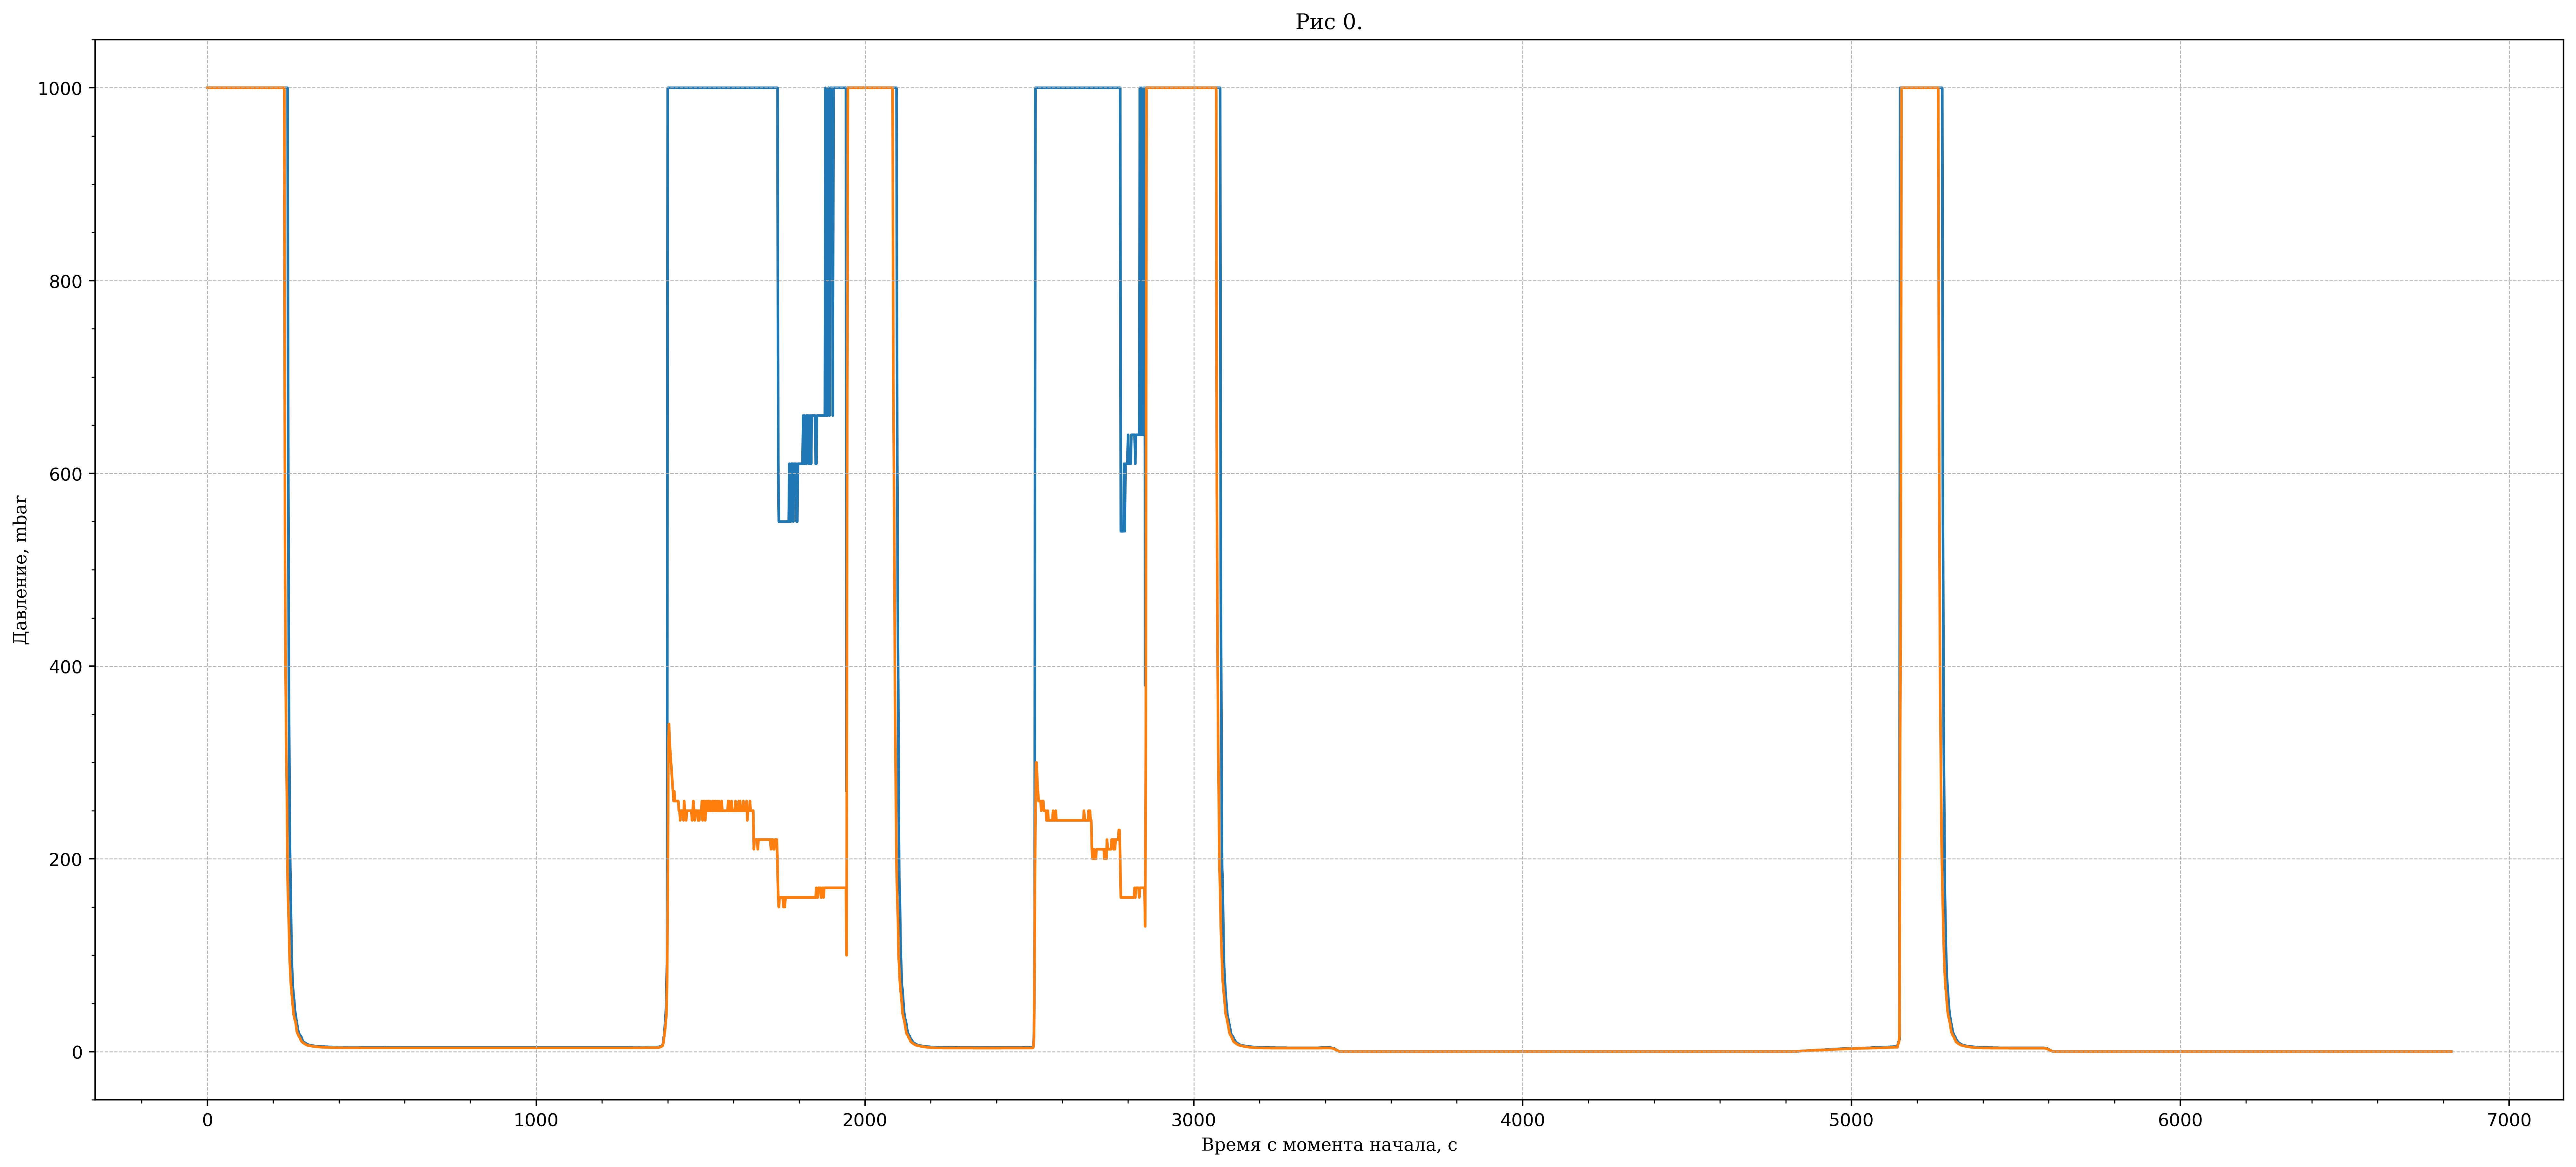

In [3]:
filename = '33_27_04_23.txt'
import time
INIT_TIME = '2023-04-27, 14:22:44'
INIT_SEC = time.mktime(time.strptime(INIT_TIME, '%Y-%m-%d, %H:%M:%S'))

# TIME, скорость вращения турбины ТМН, потребляемая турбиной ТМН мощность, комбинированный (В2) , терморезисторный (В1)
TIMES  = []
RAW_TIMES = []
SPEEDS = []
WATTS  = []
P_B2 = [] # this one is for underrange
P_B1 = [] # this one is NOT
with open(filename, 'r') as f:
    for line in f.readlines()[2:]:
        data = line.rstrip('\n').split('\t')
        
        t = data[0]  
        speed = data[1]
        watt  = data[2]
        p2, p1 = data[3], data[4]
        #print(data)
        if speed.rfind("Hz") != -1:
            speed = speed[:speed.rfind("Hz")]
            
            sec = time.mktime(time.strptime(t, '%Y-%m-%d, %H:%M:%S'))
            TIMES.append(sec - INIT_SEC)
            RAW_TIMES.append(t)
            
        if watt.rfind("W") != -1:
            watt  = watt[:watt.rfind("W")]
        if p1.rfind("mbar") != -1:
            p1    = p1[:p1.rfind("mbar")]
        if p2.rfind("mbar") != -1:
            p2    = p2[:p2.rfind("mbar")]
        #print(speed, watt, p1, p2, sep=' ')
        
        if speed != '--- no data ---':
            SPEEDS.append( int(speed) )
        if watt != '--- no data ---':
            WATTS.append( int(watt) )
            
        if p2 == 'underrange':
            P_B2.append(-0.003)
        elif p2 != '--- no data ---':
            p2 = p2.replace(',', '.')
            P_B2.append(float(p2))
        
        if p1 == 'underrange':
            P_B1.append(-0.003)
        elif p1 != '--- no data ---':
            p1 = p1.replace(',', '.')
            P_B1.append(float(p1))
            
        if (len(TIMES) != len(P_B2)):
            print(data)
###########################################################################################
import matplotlib.pyplot as plt
import numpy as np

# 11.693, 8.268
fig, ax = plt.subplots(figsize=(20, 9), dpi=400, layout='constrained')
ax.minorticks_on()
ax.grid(which='major', linestyle='--', linewidth=0.5, zorder=-1) # '-', '--', '-.', ':', '',
font = {'fontname': 'DejaVu Serif'}
ax.set_xlabel('Время с момента начала, с', **font)
ax.set_ylabel('Давление, mbar', **font)
ax.set_title('Рис 0.', wrap=True, **font)
ax.plot(TIMES, P_B2, zorder=1)
ax.plot(TIMES, P_B1, zorder=1)

# II

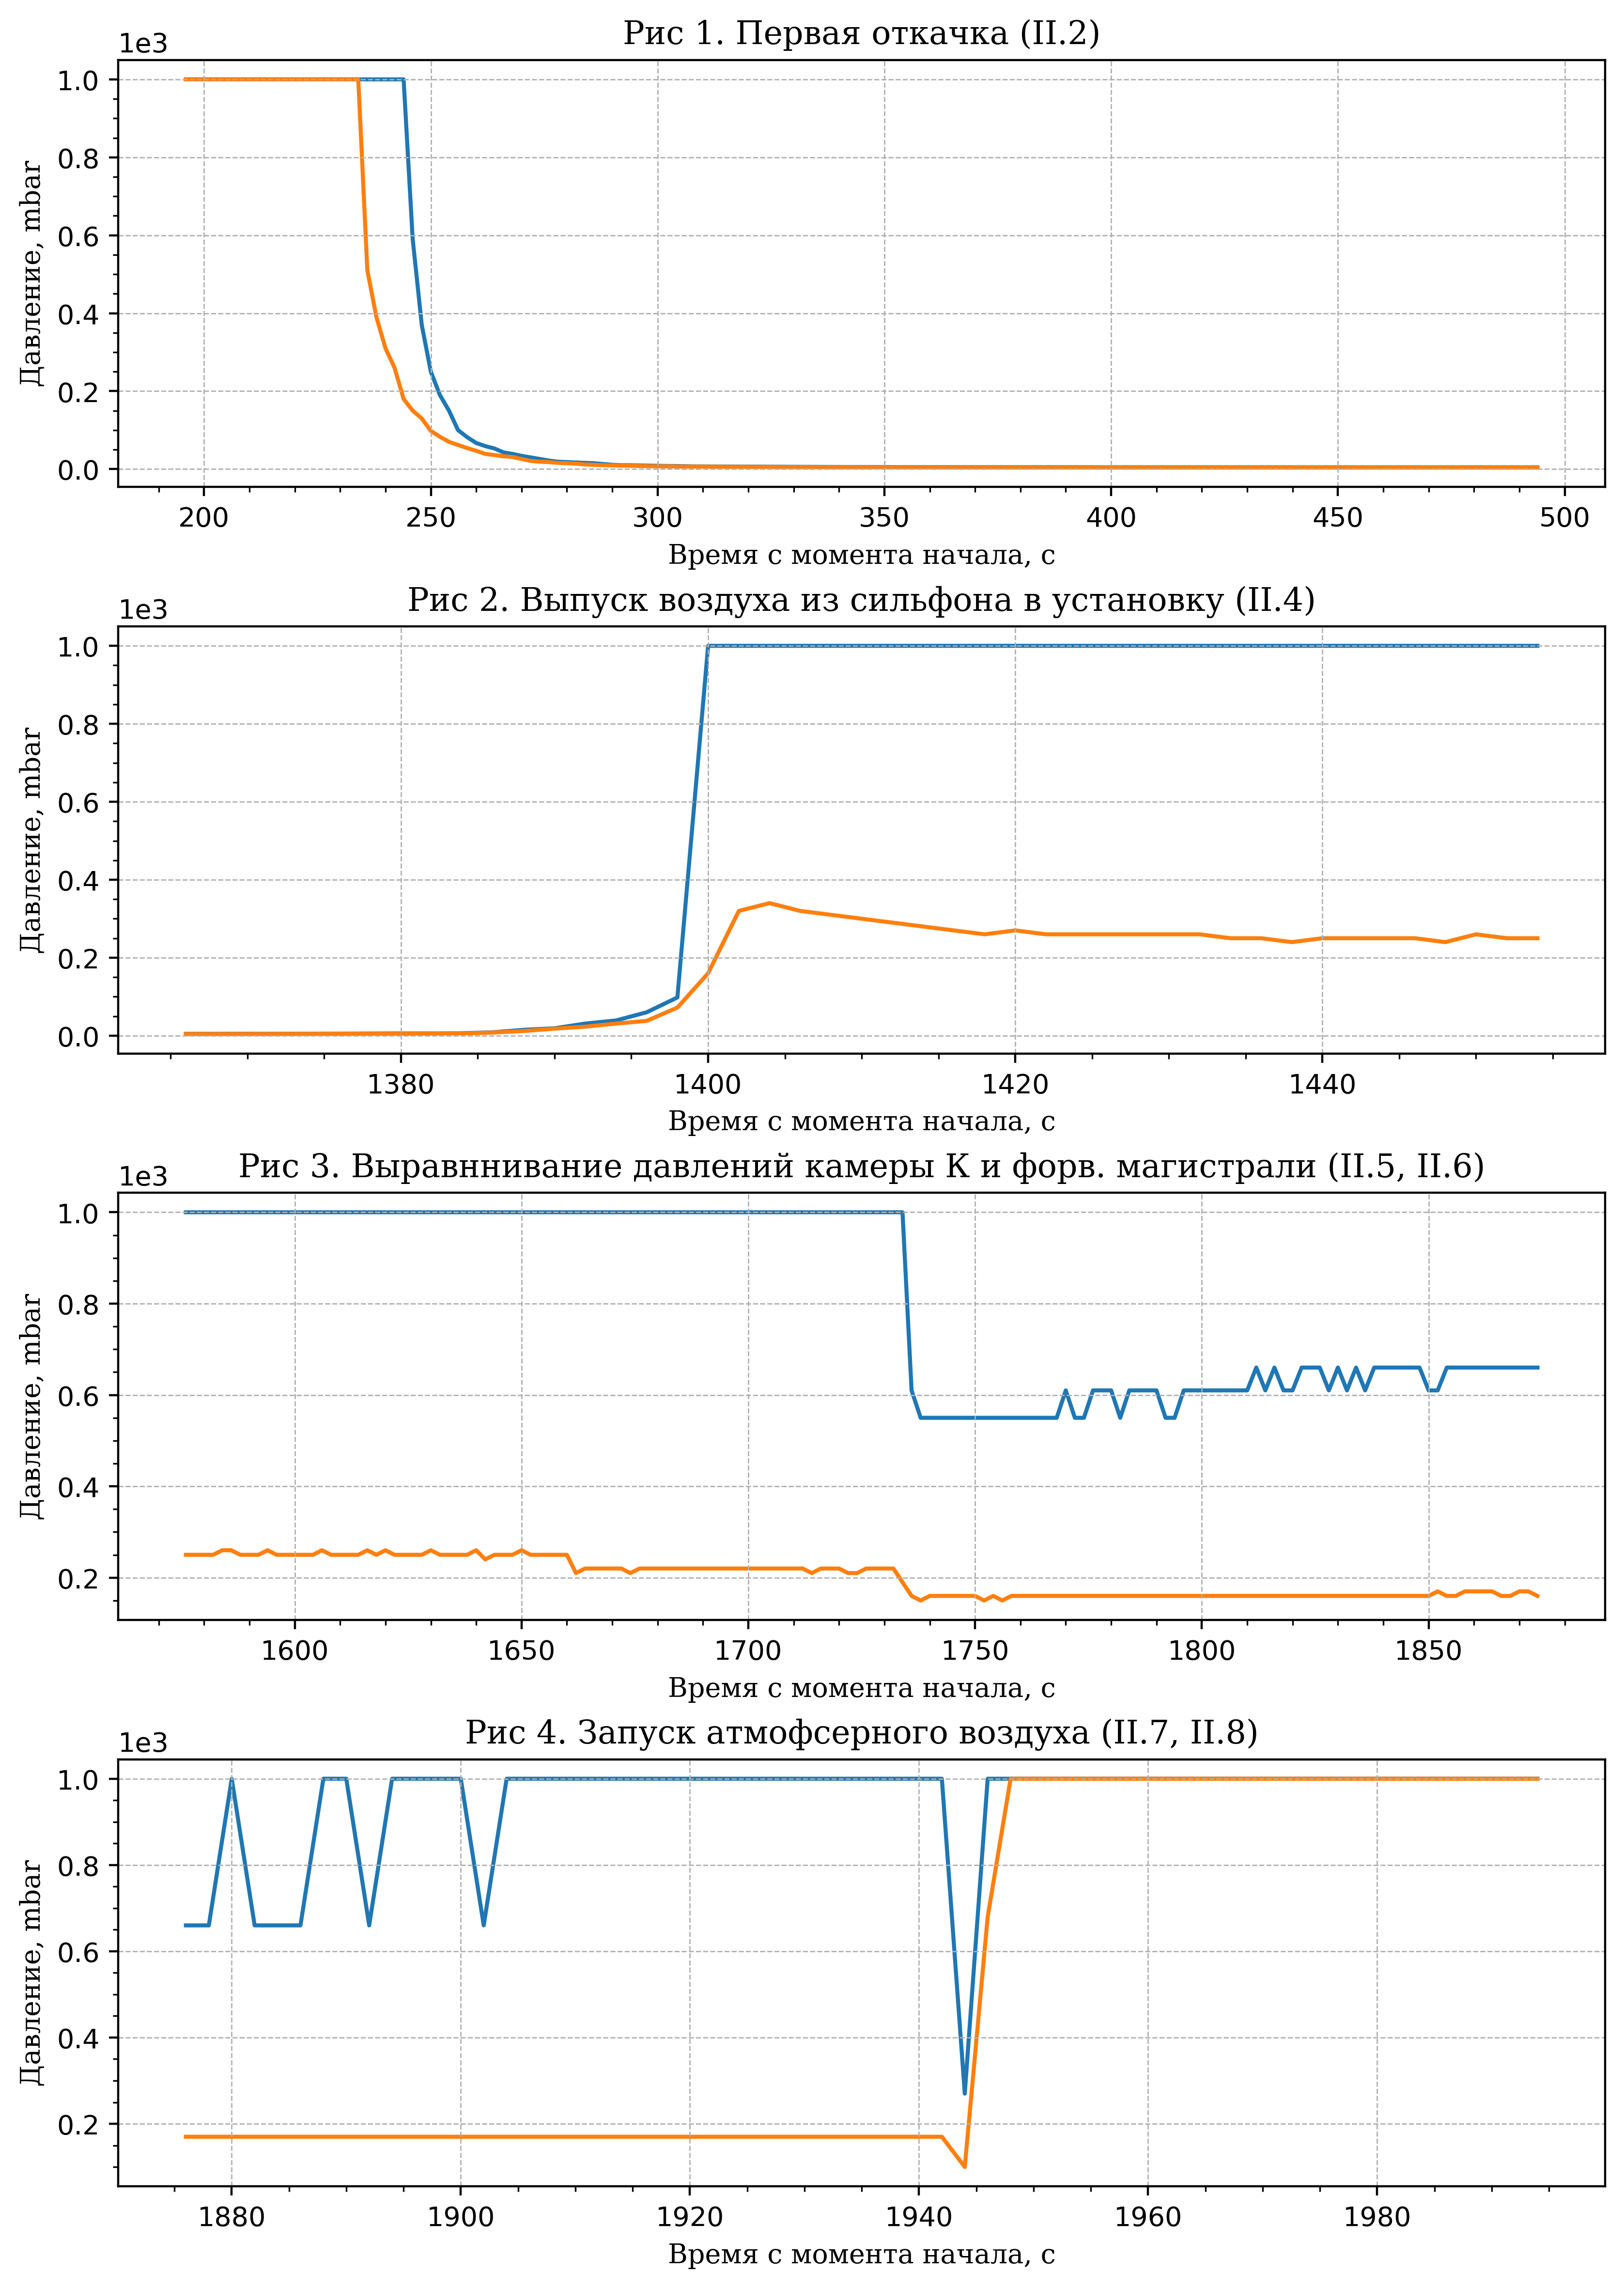

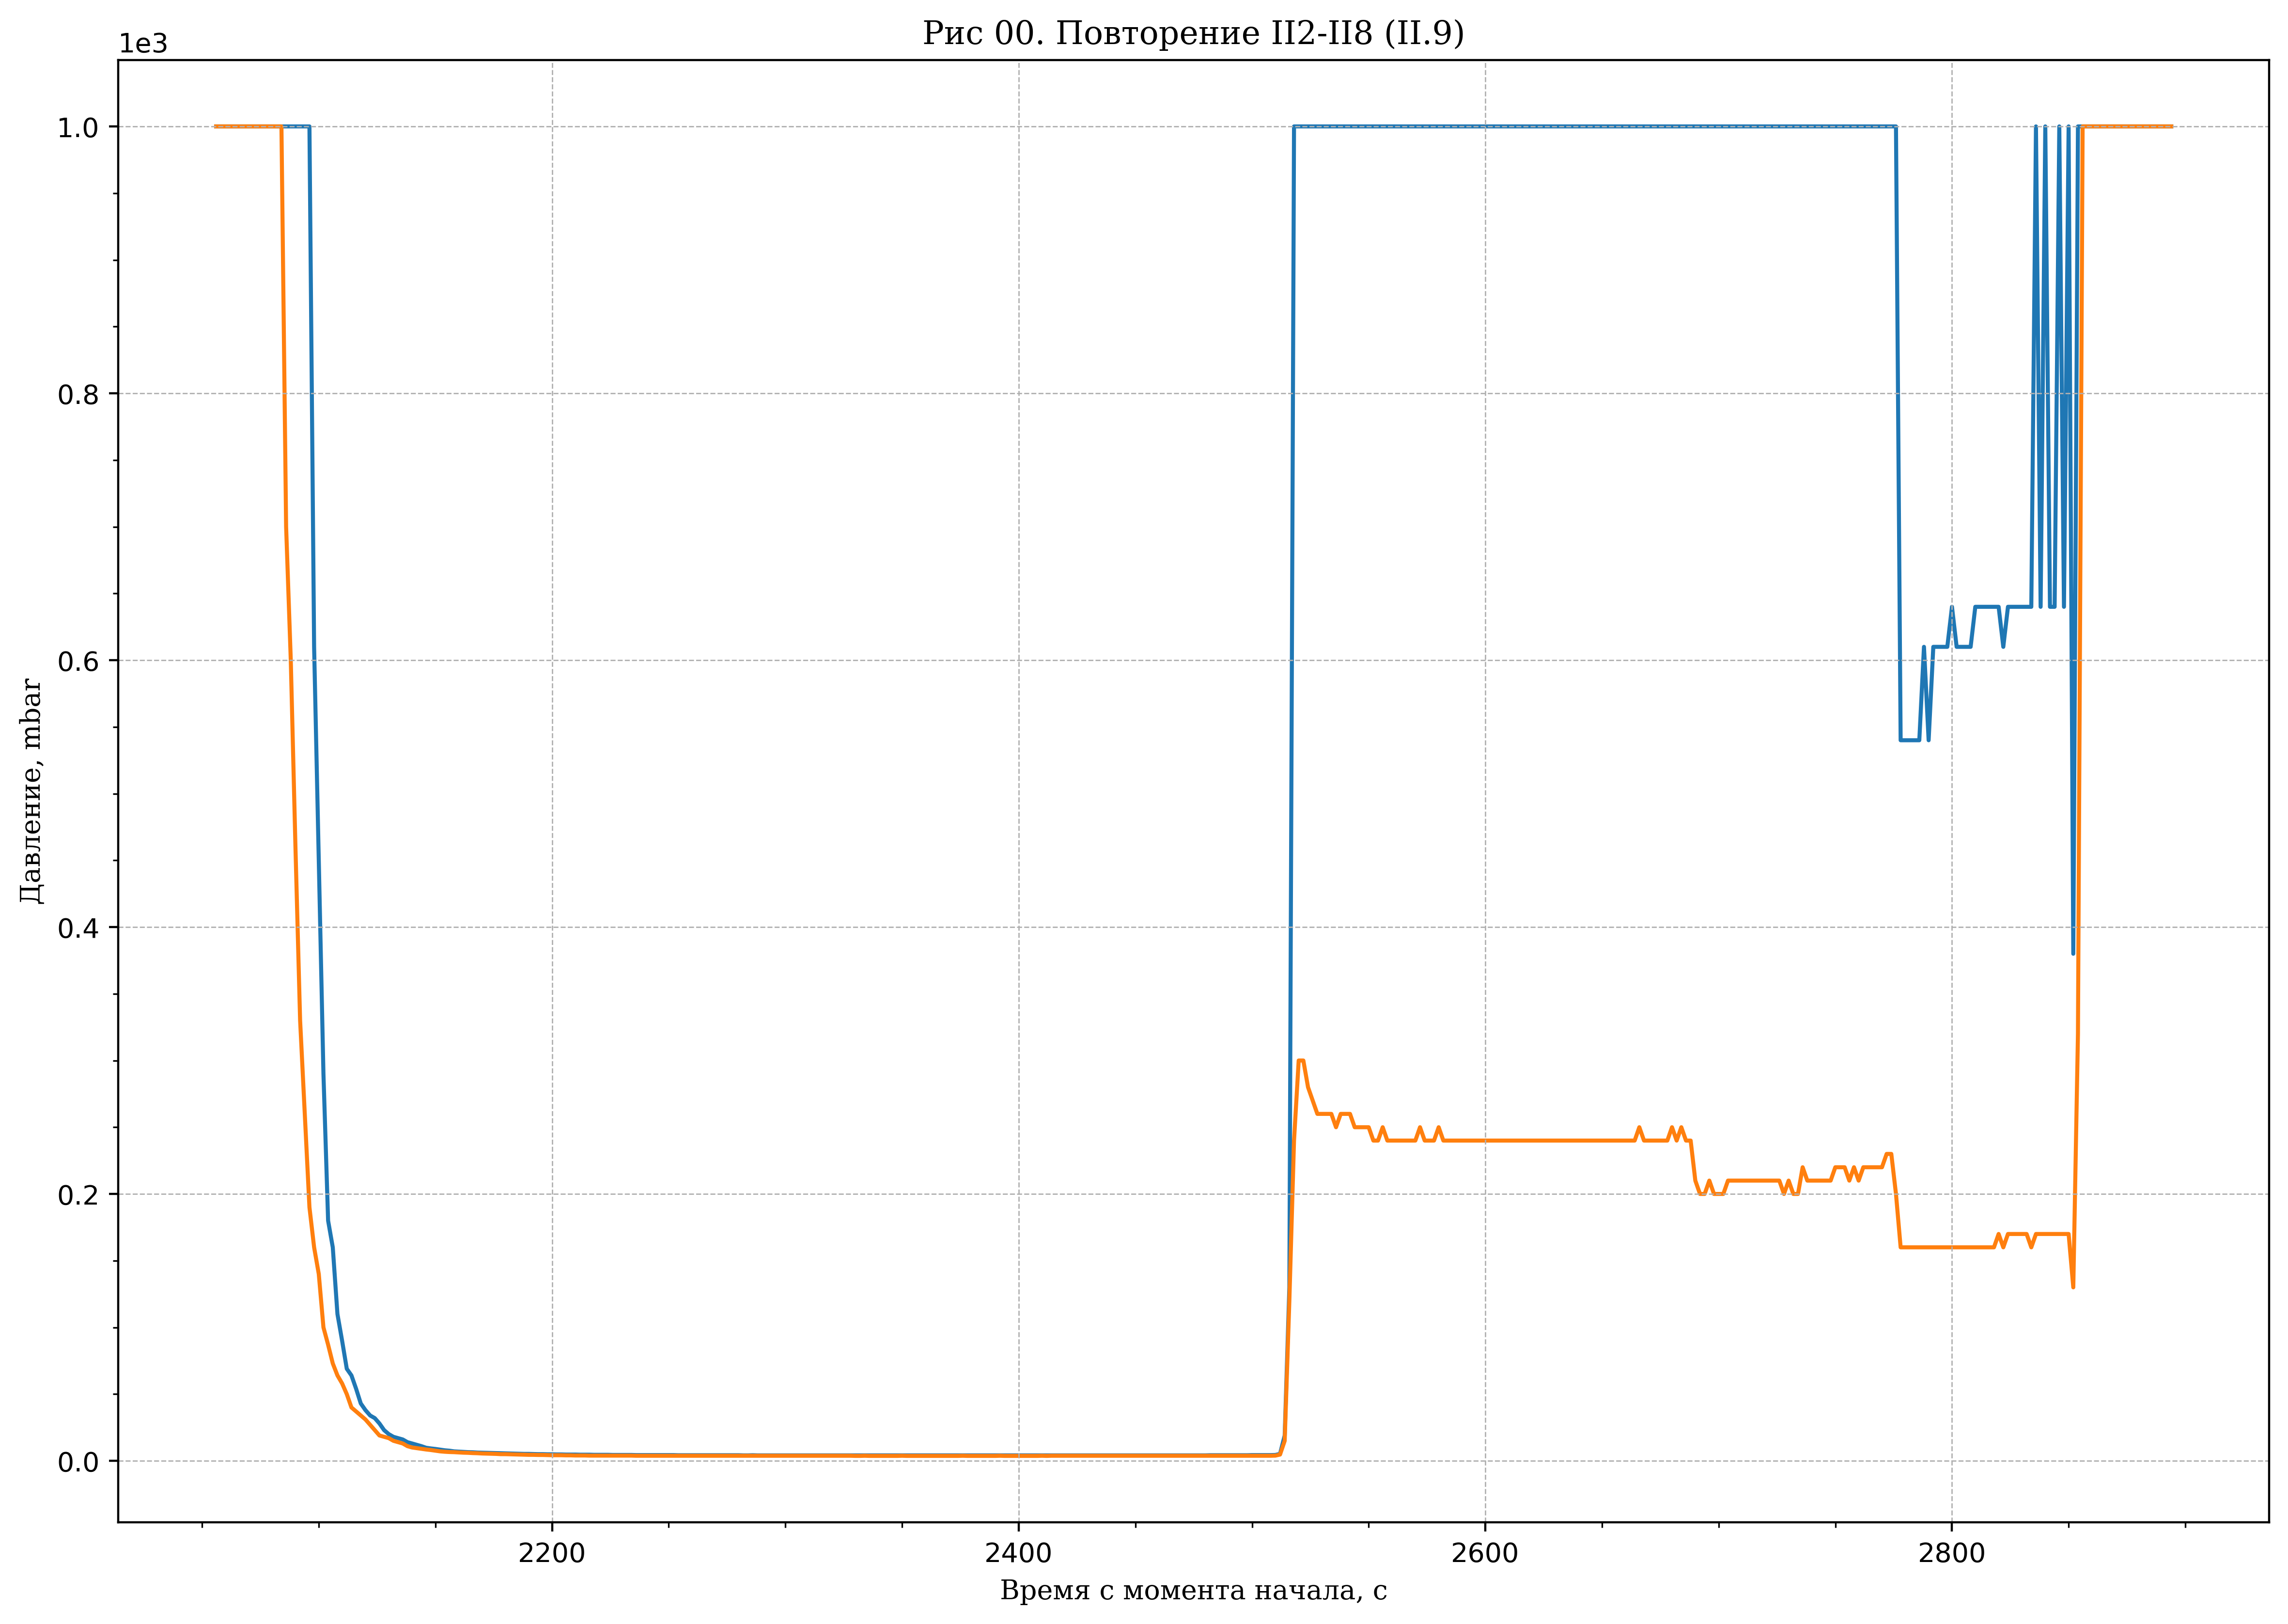

In [4]:
###############################################################
font = {'fontname': 'DejaVu Serif'}
fig = plt.figure(figsize=(8.268, 11.693), dpi=400, layout='constrained')
spec = fig.add_gridspec(4, 1)
ax_pump = fig.add_subplot(spec[0, 0])
ax_silfon = fig.add_subplot(spec[1, 0])
ax_II56 = fig.add_subplot(spec[2, 0])
ax_atm  = fig.add_subplot(spec[3, 0])
[ax.minorticks_on() for ax in fig.axes]
[ax.grid(which='major', linestyle='--', linewidth=0.5) for ax in fig.axes]
[ax.set_ylabel('Давление, mbar', **font) for ax in fig.axes]
[ax.set_xlabel('Время с момента начала, с', **font) for ax in fig.axes]
[ax.ticklabel_format(axis='y', scilimits=[0, 0]) for ax in fig.axes]
###################################################

BEGIN_PUMP = RAW_TIMES.index('2023-04-27, 14:26:00')
END_PUMP   = RAW_TIMES.index('2023-04-27, 14:31:00')
PUMP_TS    = TIMES[BEGIN_PUMP:END_PUMP]
PUMP_B2    = P_B2[BEGIN_PUMP:END_PUMP]
PUMP_B1    = P_B1[BEGIN_PUMP:END_PUMP]

ax_pump.set_title('Рис 1. Первая откачка (II.2)', wrap=True, **font)
ax_pump.plot(PUMP_TS, PUMP_B2, zorder=1)
ax_pump.plot(PUMP_TS, PUMP_B1, zorder=1)

#################

BEGIN_SILFON = RAW_TIMES.index('2023-04-27, 14:45:30')
END_SILFON   = RAW_TIMES.index('2023-04-27, 14:47:00')
SILFON_TS    = TIMES[BEGIN_SILFON:END_SILFON]
SILFON_B2    = P_B2[BEGIN_SILFON:END_SILFON]
SILFON_B1    = P_B1[BEGIN_SILFON:END_SILFON]

ax_silfon.set_title('Рис 2. Выпуск воздуха из сильфона в установку (II.4)', wrap=True, **font)
ax_silfon.plot(SILFON_TS, SILFON_B2, zorder=1)
ax_silfon.plot(SILFON_TS, SILFON_B1, zorder=1)

##################

BEGIN_II5 = RAW_TIMES.index('2023-04-27, 14:49:00')
END_II6   = RAW_TIMES.index('2023-04-27, 14:54:00')
II56_TS   = TIMES[BEGIN_II5:END_II6]
II56_B2   = P_B2[BEGIN_II5:END_II6]
II56_B1   = P_B1[BEGIN_II5:END_II6]

ax_II56.set_title('Рис 3. Выравннивание давлений камеры К и форв. магистрали (II.5, II.6)', wrap=True, **font)
ax_II56.plot(II56_TS, II56_B2, zorder=1)
ax_II56.plot(II56_TS, II56_B1, zorder=1)

###################

BEGIN_ATM = RAW_TIMES.index('2023-04-27, 14:54:00')
END_ATM   = RAW_TIMES.index('2023-04-27, 14:56:00')
ATM_TS    = TIMES[BEGIN_ATM:END_ATM]
ATM_B2    = P_B2[BEGIN_ATM:END_ATM]
ATM_B1    = P_B1[BEGIN_ATM:END_ATM]

ax_atm.set_title('Рис 4. Запуск атмофсерного воздуха (II.7, II.8)', wrap=True, **font)
ax_atm.plot(ATM_TS, ATM_B2, zorder=1)
ax_atm.plot(ATM_TS, ATM_B1, zorder=1)

###################

font = {'fontname': 'DejaVu Serif'}
fig = plt.figure(figsize=(11.693, 8.268), dpi=400, layout='constrained')
ax_again = fig.add_subplot()
[ax.minorticks_on() for ax in fig.axes]
[ax.grid(which='major', linestyle='--', linewidth=0.5) for ax in fig.axes]
[ax.set_ylabel('Давление, mbar', **font) for ax in fig.axes]
[ax.set_xlabel('Время с момента начала, с', **font) for ax in fig.axes]
[ax.ticklabel_format(axis='y', scilimits=[0, 0]) for ax in fig.axes]

BEGIN_AGAIN = RAW_TIMES.index('2023-04-27, 14:57:00') # 14:57:00
END_AGAIN   = RAW_TIMES.index('2023-04-27, 15:11:00')
AGAIN_TS    = TIMES[BEGIN_AGAIN:END_AGAIN]
AGAIN_B2    = P_B2[BEGIN_AGAIN:END_AGAIN]
AGAIN_B1    = P_B1[BEGIN_AGAIN:END_AGAIN]

ax_again.set_title('Рис 00. Повторение II2-II8 (II.9)', wrap=True, **font)
ax_again.plot(AGAIN_TS, AGAIN_B2, zorder=1)
ax_again.plot(AGAIN_TS, AGAIN_B1, zorder=1)

# III

Коэффиценты прямой: k1, s_k, b, s_b
53463.900208850064	1369.169988038811	15.272261808406936	0.05412981390772163
Коэффиценты прямой: k2, s_k, b, s_b
3711.716885623793	125.22008894245768	21.8326174895716	0.10655535288721513
k1 / k2 = 14.404088958381019


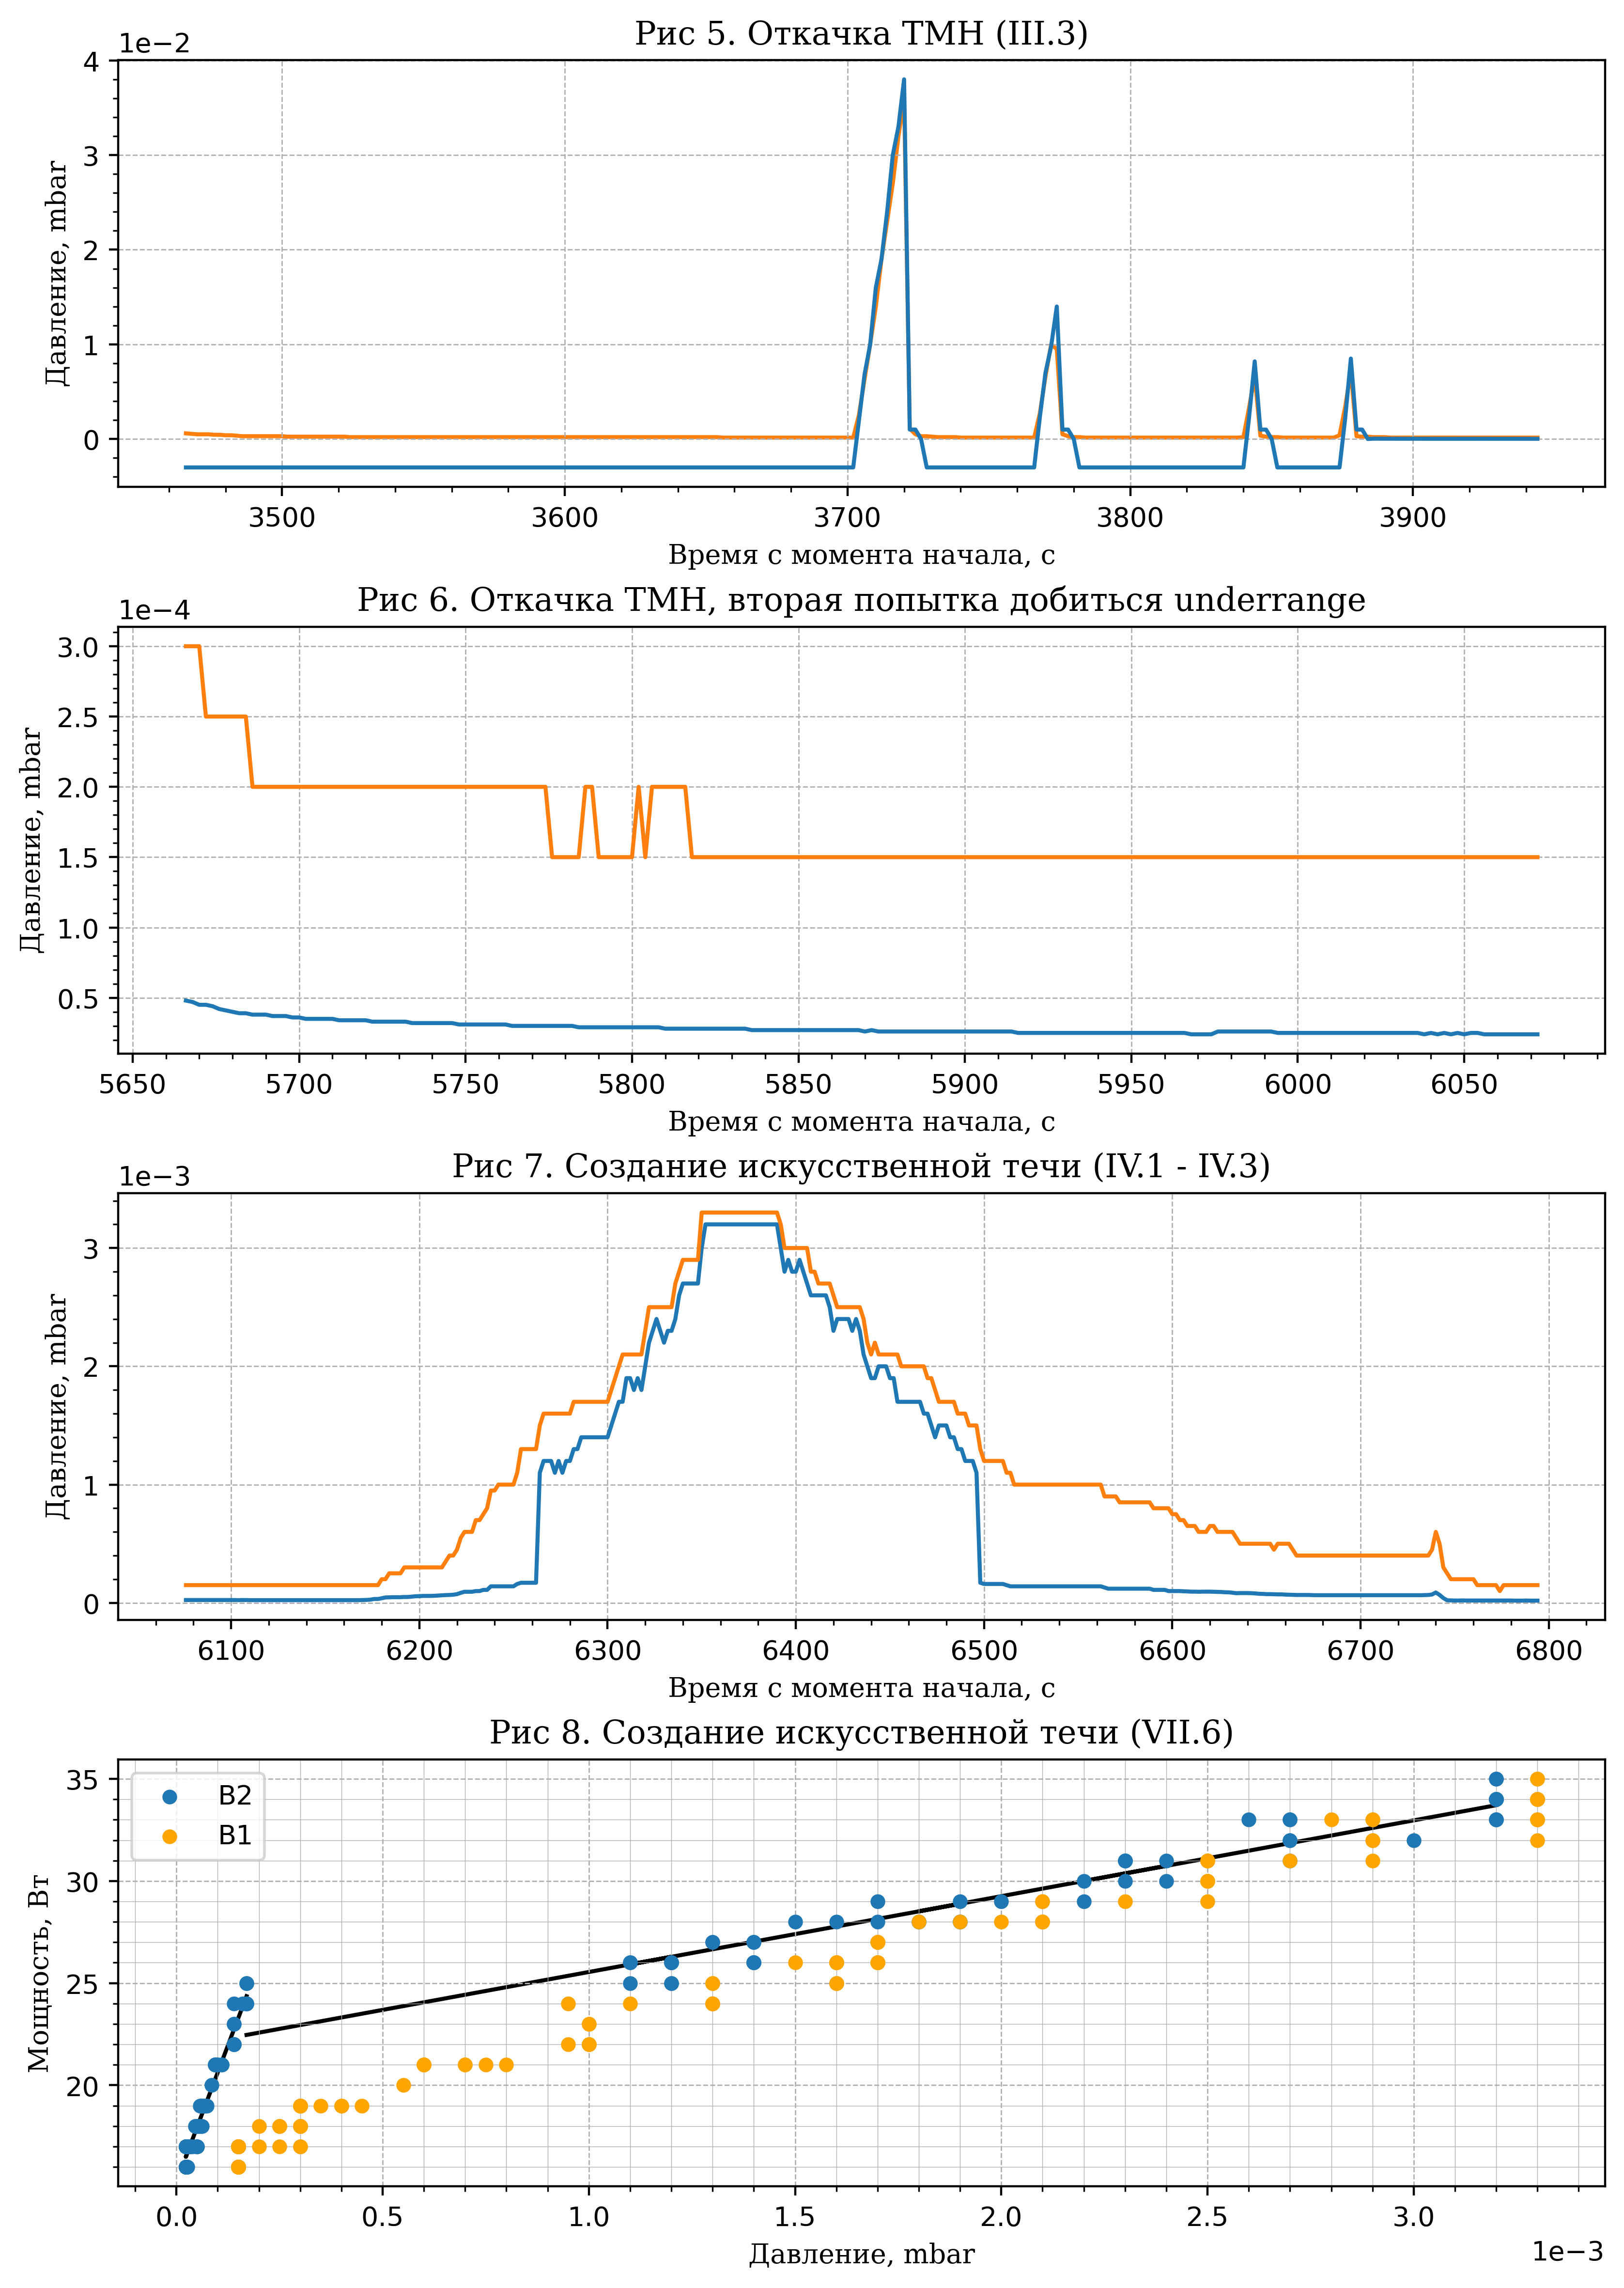

In [5]:
font = {'fontname': 'DejaVu Serif'}
fig = plt.figure(figsize=(8.268, 11.693), dpi=400, layout='constrained')
spec = fig.add_gridspec(4, 1)
ax_pump = fig.add_subplot(spec[0, 0])
ax_try = fig.add_subplot(spec[1, 0])
ax_leak = fig.add_subplot(spec[2, 0])
ax_watts  = fig.add_subplot(spec[3, 0])
[ax.minorticks_on() for ax in fig.axes]
[ax.grid(which='major', linestyle='--', linewidth=0.5) for ax in fig.axes]
[ax.set_ylabel('Давление, mbar', **font) for ax in fig.axes]
[ax.set_xlabel('Время с момента начала, с', **font) for ax in fig.axes]
[ax.ticklabel_format(axis='y', scilimits=[0, 0]) for ax in fig.axes]
###################################################

BEGIN_PUMP = RAW_TIMES.index('2023-04-27, 15:20:30') # 15:19:00
END_PUMP   = RAW_TIMES.index('2023-04-27, 15:28:30') # 15:21:00 
PUMP_TS    = TIMES[BEGIN_PUMP:END_PUMP]
PUMP_B2    = P_B2[BEGIN_PUMP:END_PUMP]
PUMP_B1    = P_B1[BEGIN_PUMP:END_PUMP]

ax_pump.set_title('Рис 5. Откачка ТМН (III.3)', wrap=True, **font)
ax_pump.plot(PUMP_TS, PUMP_B2, zorder=2)
ax_pump.plot(PUMP_TS, PUMP_B1, zorder=1)
# LOOKS LIKE THE PEAKS ARE III.4 AND YOU SEE HOW I BROKE THE THING.
################

BEGIN_TRY = RAW_TIMES.index('2023-04-27, 15:57:10') # 15:29:00 - nothing, same as fig. 7
END_TRY   = RAW_TIMES.index('2023-04-27, 16:03:58') # 
PUMP_TS    = TIMES[BEGIN_TRY:END_TRY]
PUMP_B2    = P_B2[BEGIN_TRY:END_TRY]
PUMP_B1    = P_B1[BEGIN_TRY:END_TRY]

ax_try.set_title('Рис 6. Откачка ТМН, вторая попытка добиться underrange', wrap=True, **font)
ax_try.plot(PUMP_TS, PUMP_B2, zorder=2)
ax_try.plot(PUMP_TS, PUMP_B1, zorder=3)

###############

BEGIN_LEAK = RAW_TIMES.index('2023-04-27, 16:04:00') #
END_LEAK   = RAW_TIMES.index('2023-04-27, 16:16:00') # 
PUMP_TS    = TIMES[BEGIN_LEAK:END_LEAK]
PUMP_B2    = P_B2[BEGIN_LEAK:END_LEAK]
PUMP_B1    = P_B1[BEGIN_LEAK:END_LEAK]

ax_leak.set_title('Рис 7. Создание искусственной течи (IV.1 - IV.3)', wrap=True, **font)
ax_leak.plot(PUMP_TS, PUMP_B2, zorder=2)
ax_leak.plot(PUMP_TS, PUMP_B1, zorder=3)

################ 

BEGIN_LEAK = RAW_TIMES.index('2023-04-27, 16:04:00') #
END_LEAK   = RAW_TIMES.index('2023-04-27, 16:09:00') # 
PUMP_WS    = WATTS[BEGIN_LEAK:END_LEAK]
PUMP_B2    = P_B2[BEGIN_LEAK:END_LEAK]
PUMP_B1    = P_B1[BEGIN_LEAK:END_LEAK]

[ax.ticklabel_format(axis='y', scilimits=[0, 20]) for ax in fig.axes]
ax_watts.set_title('Рис 8. Создание искусственной течи (VII.6)', wrap=True, **font)
ax_watts.set_ylabel('Мощность, Вт', **font)
ax_watts.set_xlabel('Давление, mbar', **font)
ax_watts.ticklabel_format(axis='x', scilimits=[0, 0])
ax_watts.grid(which='minor', linestyle='-', linewidth=0.25)

ax_watts.scatter(PUMP_B2, PUMP_WS, zorder=2, marker='o', s=20, label='B2')
ax_watts.scatter(PUMP_B1, PUMP_WS, zorder=3, marker='o', color='orange', s=20, label='B1')

FIRST_END = PUMP_WS.index(25)
SECOND_BEGIN = FIRST_END + 1
PUMP_B1 = np.array(PUMP_B1)
PUMP_WS = np.array(PUMP_WS)
(k, s_k, b, s_b) = lin_ls(PUMP_B1, PUMP_WS, through_null=False)
#ax_watts.plot(PUMP_B1, PUMP_B1 * k + b, color='k', zorder=-1)
#print('Коэффиценты прямой: k, s_k, b, s_b')
#print(k, s_k, b, s_b, sep='\t')
plt.legend()

PUMP_B2 = np.array(PUMP_B2)
(k1, s_k, b, s_b) = lin_ls(PUMP_B2[:FIRST_END], PUMP_WS[:FIRST_END], through_null=False)
ax_watts.plot(PUMP_B2[:FIRST_END], PUMP_B2[:FIRST_END] * k1 + b, color='k', zorder=-1)
print('Коэффиценты прямой: k1, s_k, b, s_b')
print(k1, s_k, b, s_b, sep='\t')

(k2, s_k, b, s_b) = lin_ls(PUMP_B2[SECOND_BEGIN:], PUMP_WS[SECOND_BEGIN:], through_null=False)
ax_watts.plot(PUMP_B2[SECOND_BEGIN:], PUMP_B2[SECOND_BEGIN:] * k2 + b, color='k', zorder=-1)
print('Коэффиценты прямой: k2, s_k, b, s_b')
print(k2, s_k, b, s_b, sep='\t')
print(f'k1 / k2 = {k1 / k2}')
plt.legend()

In [6]:
def lin_ls(x, y, through_null=False):
    if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
        if len(x) != len(y):
            raise ValueError("Incompatible x and y vectors. They must have the same length.")
        if through_null:
            k = np.mean(x * y) / np.mean(x * x)
            s_k = np.sqrt(1 / len(x)) * np.sqrt(np.mean(y * y) / np.mean(x * x) - k ** 2)
            return k, s_k
        else:
            xy = np.mean(x * y)
            x1y = np.mean(x) * np.mean(y)
            x2 = np.mean(x * x)
            x12 = np.mean(x) ** 2
            y2 = np.mean(y * y)
            y12 = np.mean(y) ** 2
            k = (xy - x1y) / (x2 - x12)
            b = np.mean(y) - k * np.mean(x)
            s_k = np.sqrt(1 / len(x)) * np.sqrt((y2 - y12) / (x2 - x12) - k ** 2)
            s_b = s_k * np.sqrt(x2 - x12)
            return k, s_k, b, s_b
    else:
        raise ValueError("Invalid x or/and y type. Must be numpy.ndarray.")

Коэффиценты прямой: k, s_k, b, s_b
-0.059939073710783455	0.0012646830734058172	24.06547734051619	0.013853908947986559
tau = 16.683607838605838 +- 0.021099476436825415
S0 = 47.65156360007285 +- 3.3571290747579496
Коэффиценты прямой: k, s_k, b, s_b
-0.06138860934211531	0.0017010784112684064	24.761436661374912	0.018634380358735127
tau = 16.289666938487816 +- 0.027710000755814337
S0 = 48.80394442698167 +- 3.43876440391229
Коэффиценты прямой: k, s_k, b, s_b
-0.05991128829404794	0.0011617179776113185	135.0502588755642	0.013397585294156899
tau = 16.691345295262963 +- 0.019390635900025086
S0 = 47.62947419376811 +- 3.355488388066257
Коэффиценты прямой: k, s_k, b, s_b
-0.019572143343716344	0.0010845113855709404	65.00675079160315	0.023785191585380883
tau = 51.09302453177929 +- 0.05541096682797001
S0 = 15.559853958254493 +- 1.0961699236494997


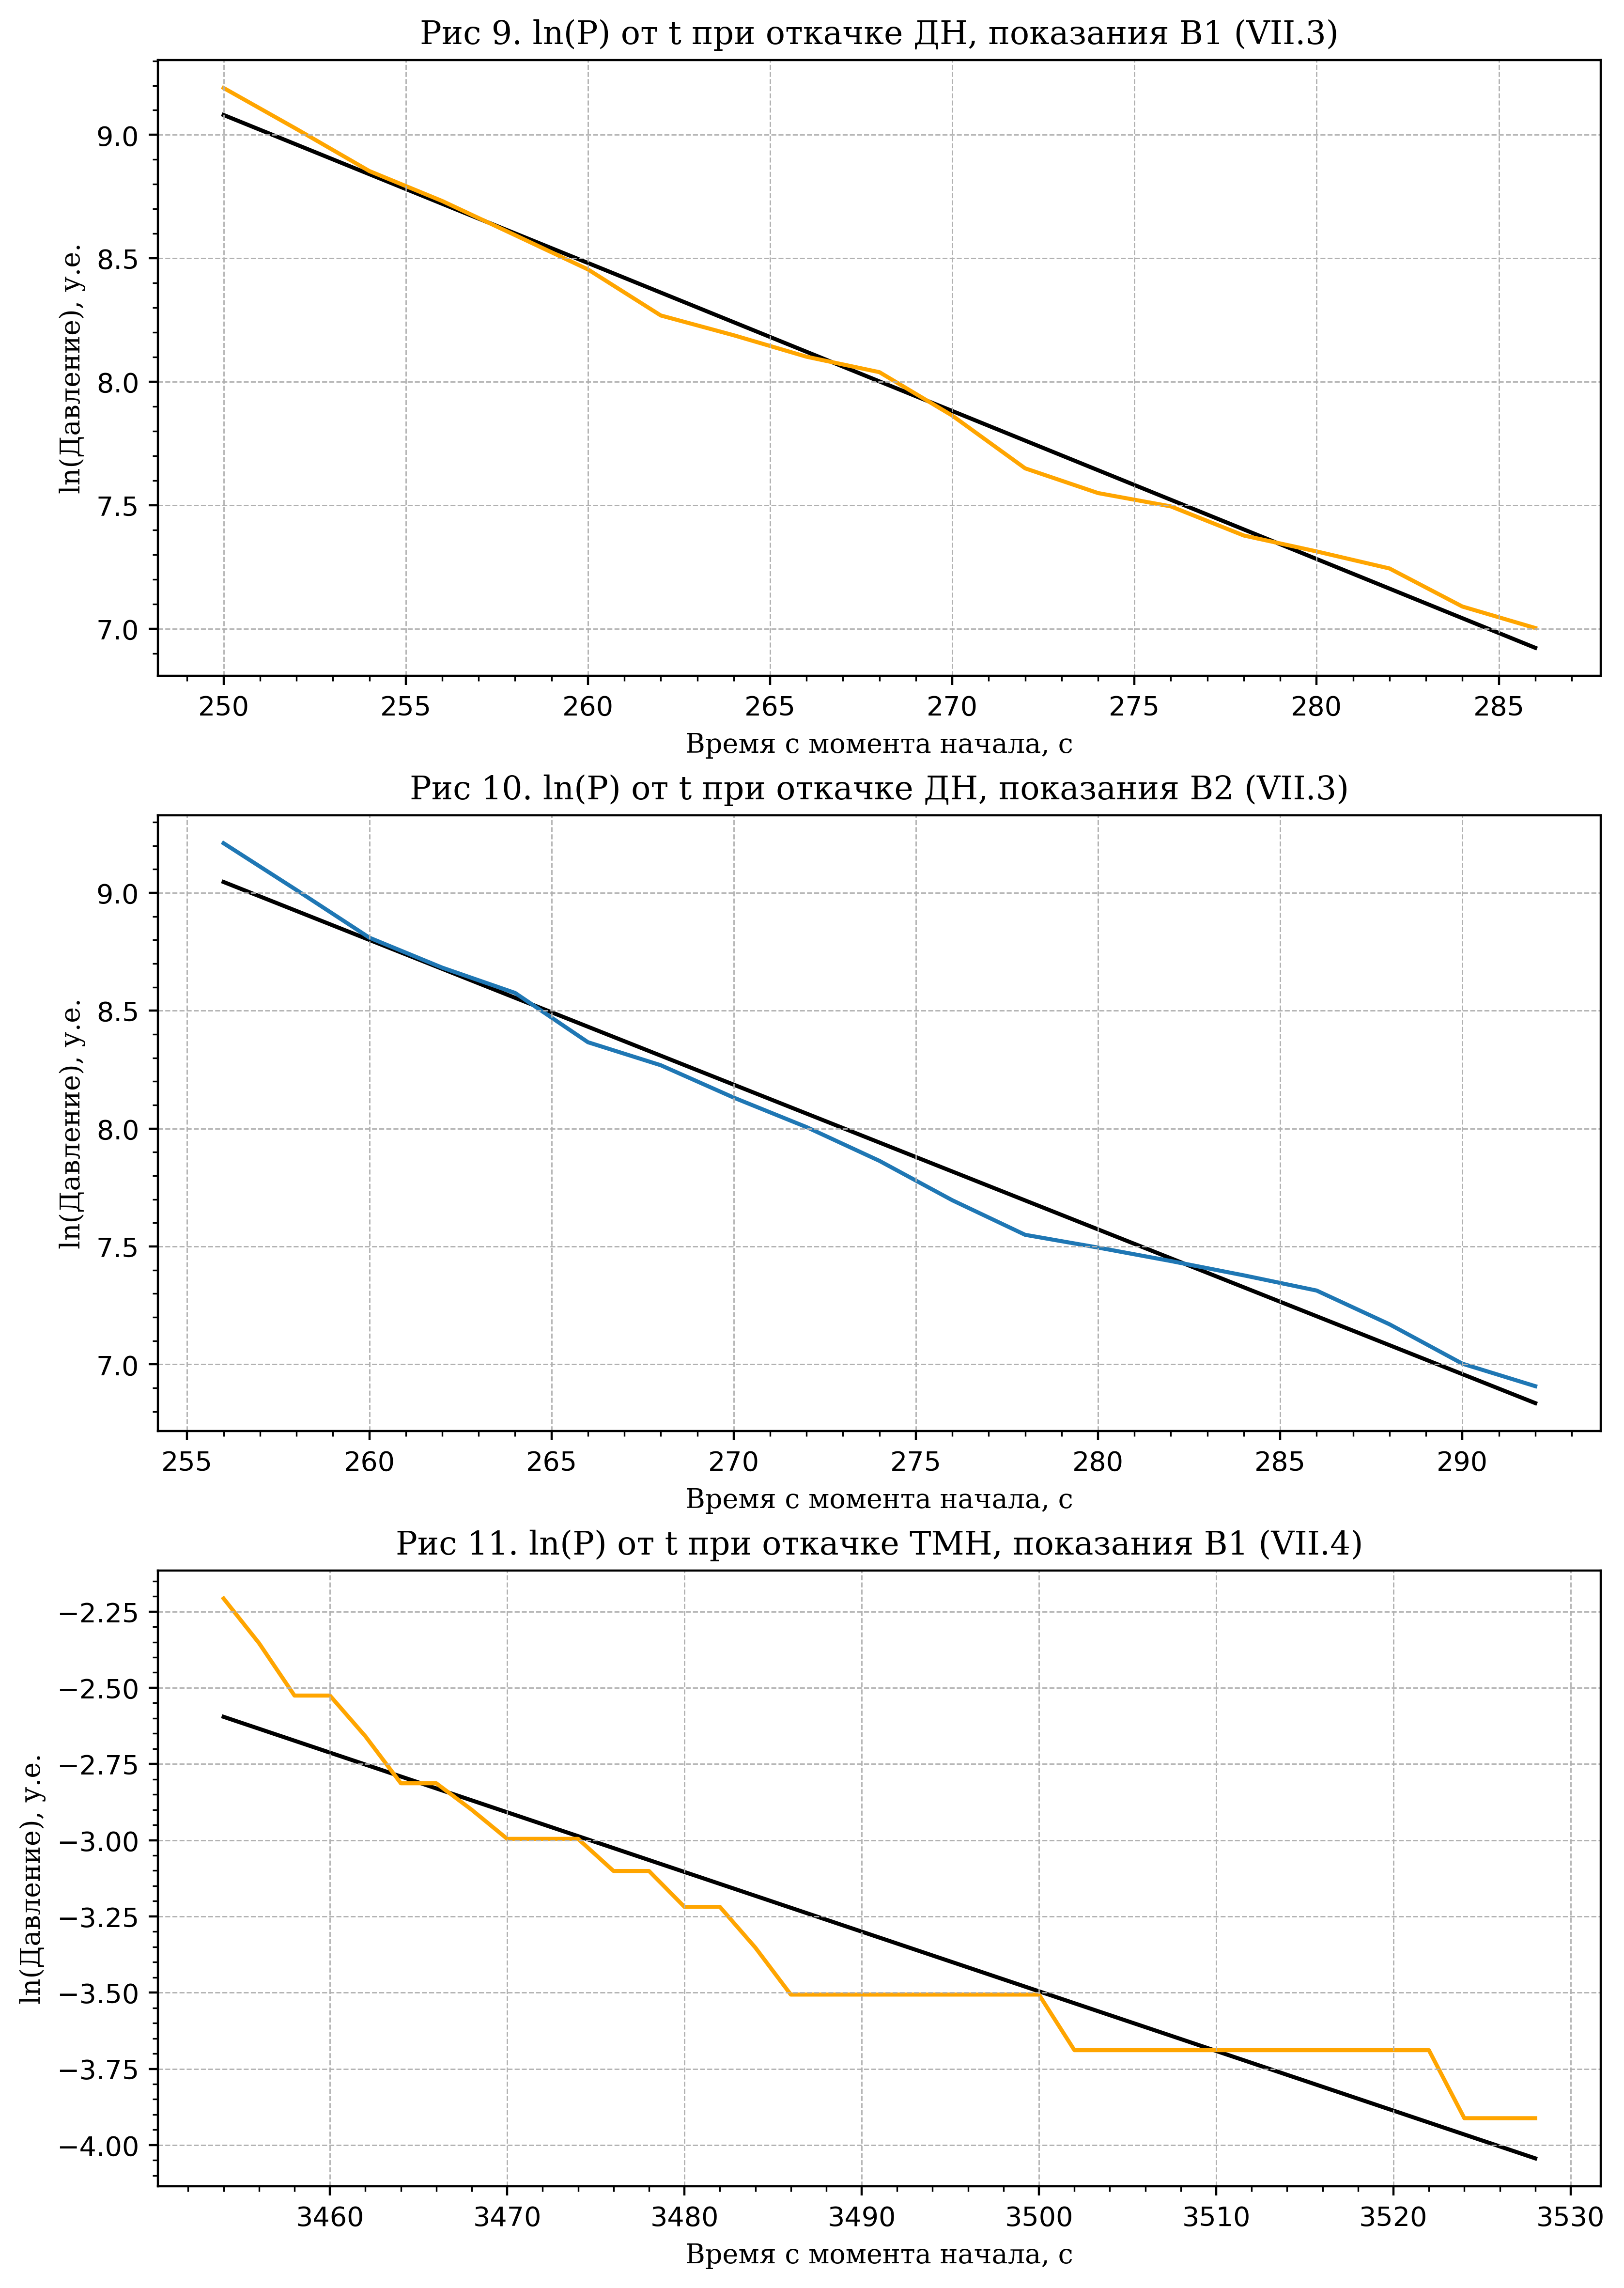

In [7]:
font = {'fontname': 'DejaVu Serif'}
fig = plt.figure(figsize=(8.268, 11.693), dpi=400, layout='constrained')
spec = fig.add_gridspec(3, 1)
ax_pump_b1 = fig.add_subplot(spec[0, 0])
ax_pump_b2 = fig.add_subplot(spec[1, 0])
ax_pumpt_b1 = fig.add_subplot(spec[2, 0])
#ax_leak     = fig.add_subplot(spec[3, 0])
[ax.minorticks_on() for ax in fig.axes]
[ax.grid(which='major', linestyle='--', linewidth=0.5) for ax in fig.axes]
[ax.set_ylabel('ln(Давление), у.е.', **font) for ax in fig.axes]
[ax.set_xlabel('Время с момента начала, с', **font) for ax in fig.axes]
# [ax.ticklabel_format(axis='y', scilimits=[0, 0]) for ax in fig.axes]
###################################################

BEGIN_PUMP = RAW_TIMES.index('2023-04-27, 14:26:54')
END_PUMP   = RAW_TIMES.index('2023-04-27, 14:27:32')
PUMP_TS    = TIMES[BEGIN_PUMP:END_PUMP]
PUMP_B1    = P_B1[BEGIN_PUMP:END_PUMP]

PUMP_B1 = np.array(PUMP_B1) * 1e-3 * 1e5
ax_pump_b1.set_title('Рис 9. ln(P) от t при откачке ДН, показания В1 (VII.3)', wrap=True, **font)
ax_pump_b1.plot(PUMP_TS, np.log(PUMP_B1), zorder=1, color='orange')

PUMP_TS = np.array(PUMP_TS)
(k, s_k, b, s_b) = lin_ls(PUMP_TS, np.log(PUMP_B1), through_null=False)
ax_pump_b1.plot(PUMP_TS, PUMP_TS * k + b, color='k', zorder=-1)
print('Коэффиценты прямой: k, s_k, b, s_b')
print(k, s_k, b, s_b, sep='\t')
print(f'tau = {-1/k} +- {-s_k / k}')
tau, sigma_tau = -1/k, -s_k / k
Vk, sigma_Vk = 795, 56
sigma_S0 = np.sqrt(
    np.square(sigma_Vk / tau) +
    np.square(Vk * sigma_tau / (tau * tau))
)
print(f'S0 = {Vk * (-k)} +- {sigma_S0}')

##################

BEGIN_PUMP = RAW_TIMES.index('2023-04-27, 14:27:00')
END_PUMP   = RAW_TIMES.index('2023-04-27, 14:27:38')
PUMP_TS    = TIMES[BEGIN_PUMP:END_PUMP]
PUMP_B2    = P_B2[BEGIN_PUMP:END_PUMP]
PUMP_B2 = np.array(PUMP_B2) * 1e-3 * 1e5
ax_pump_b2.set_title('Рис 10. ln(P) от t при откачке ДН, показания B2 (VII.3)', wrap=True, **font)
ax_pump_b2.plot(PUMP_TS, np.log(PUMP_B2), zorder=1)

PUMP_TS = np.array(PUMP_TS)
(k, s_k, b, s_b) = lin_ls(PUMP_TS, np.log(PUMP_B2), through_null=False)
ax_pump_b2.plot(PUMP_TS, PUMP_TS * k + b, color='k', zorder=-1)
print('Коэффиценты прямой: k, s_k, b, s_b')
print(k, s_k, b, s_b, sep='\t')
print(f'tau = {-1/k} +- {-s_k / k}')
tau, sigma_tau = -1/k, -s_k / k
Vk, sigma_Vk = 795, 56
sigma_S0 = np.sqrt(
    np.square(sigma_Vk / tau) +
    np.square(Vk * sigma_tau / (tau * tau))
)
print(f'S0 = {Vk * (-k)} +- {sigma_S0}')

##################

BEGIN_PUMP = RAW_TIMES.index('2023-04-27, 14:57:46')
END_PUMP   = RAW_TIMES.index('2023-04-27, 14:58:26')
PUMP_TS    = TIMES[BEGIN_PUMP:END_PUMP]
PUMP_B1    = P_B1[BEGIN_PUMP:END_PUMP]
PUMP_B1 = np.array(PUMP_B1) * 1e-3 * 1e5
#ax_pump_ag1.set_title('Рис 13. ln(P) от t при откачке ДН, показания B1, вторая откачка (VII.3)', wrap=True, **font)
#ax_pump_ag1.plot(PUMP_TS, np.log(PUMP_B1), zorder=1, color='orange')
# print(PUMP_B1[-1])
PUMP_TS = np.array(PUMP_TS)
(k, s_k, b, s_b) = lin_ls(PUMP_TS, np.log(PUMP_B1), through_null=False)
#ax_pump_ag1.plot(PUMP_TS, PUMP_TS * k + b, color='k', zorder=-1)
print('Коэффиценты прямой: k, s_k, b, s_b')
print(k, s_k, b, s_b, sep='\t')
print(f'tau = {-1/k} +- {-s_k / k}')
tau, sigma_tau = -1/k, -s_k / k
Vk, sigma_Vk = 795, 56
sigma_S0 = np.sqrt(
    np.square(sigma_Vk / tau) +
    np.square(Vk * sigma_tau / (tau * tau))
)
print(f'S0 = {Vk * (-k)} +- {sigma_S0}')

##################

ax_pumpt_b1.ticklabel_format(axis='y', scilimits=[0, 0])

BEGIN_PUMP = RAW_TIMES.index('2023-04-27, 15:20:18') # 15:19:00
END_PUMP   = RAW_TIMES.index('2023-04-27, 15:21:34') # 15:21:00 
PUMP_TS    = TIMES[BEGIN_PUMP:END_PUMP]
PUMP_B1    = P_B1[BEGIN_PUMP:END_PUMP]
PUMP_B1 = np.array(PUMP_B1) * 1e-3 * 1e5
ax_pumpt_b1.set_title('Рис 11. ln(P) от t при откачке ТМН, показания B1 (VII.4)', wrap=True, **font)
ax_pumpt_b1.plot(PUMP_TS, np.log(PUMP_B1), zorder=1, color='orange')
PUMP_TS = np.array(PUMP_TS) # 2e-4 mbar = min pressure
(k, s_k, b, s_b) = lin_ls(PUMP_TS, np.log(PUMP_B1), through_null=False)
ax_pumpt_b1.plot(PUMP_TS, PUMP_TS * k + b, color='k', zorder=-1)
print('Коэффиценты прямой: k, s_k, b, s_b')
print(k, s_k, b, s_b, sep='\t')
print(f'tau = {-1/k} +- {-s_k / k}')
tau, sigma_tau = -1/k, -s_k / k
Vk, sigma_Vk = 795, 56
sigma_S0 = np.sqrt(
    np.square(sigma_Vk / tau) +
    np.square(Vk * sigma_tau / (tau * tau))
)
print(f'S0 = {Vk * (-k)} +- {sigma_S0}')

###################################

In [8]:
sigma = 1.06e-19
k = 1.38e-23
T = 293
d = 1e-2
P = 1.5 * 1e-4 * 1e-3 * 1e5
Kn = k * T / (np.sqrt(2) * sigma * P * d)
print(f'{Kn:.2E}')

1.80E+02
